In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14      
%matplotlib inline

from skimage.io import imread
from skimage.transform import rotate

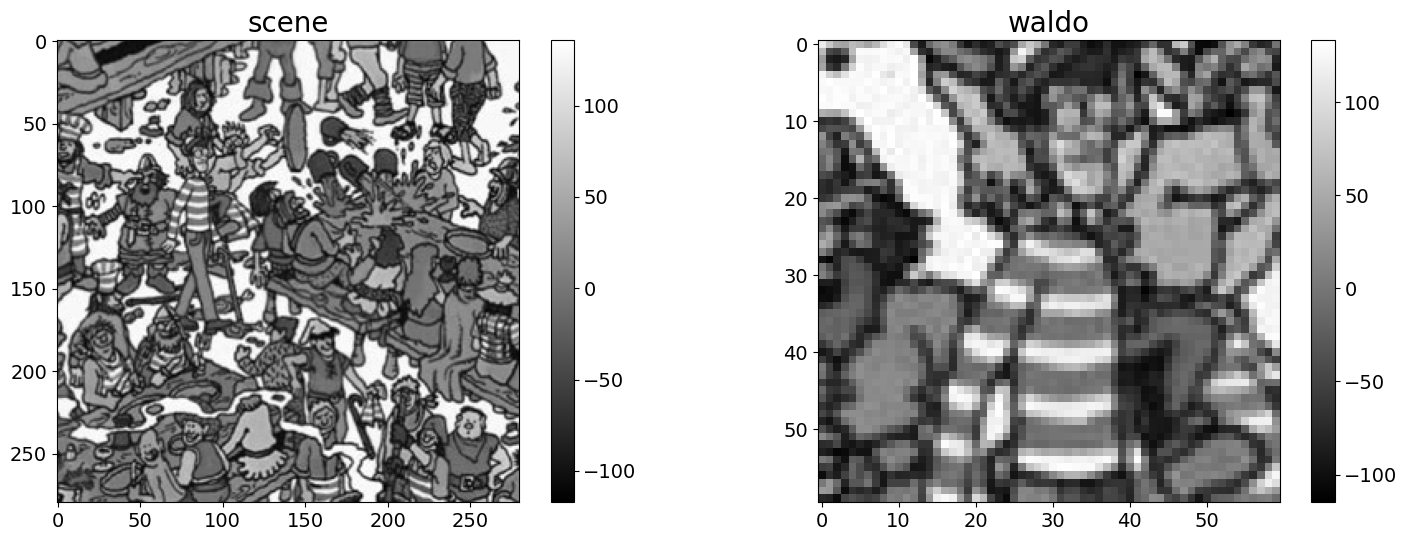

In [2]:
scene = imread('waldo_scene.tif')
waldo = imread('waldo_bw_small.tif')

# caveat:
# correlation increases with the magnitude of the gray values. We want also black areas to be included
# -> one solution is to subtract mean gray value
scene = scene -np.mean(scene)
waldo = waldo -np.mean(waldo)


plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.imshow(scene, cmap=plt.cm.gray)
plt.colorbar()
plt.title('scene', fontsize=20)

plt.subplot(122)
plt.imshow(waldo, cmap=plt.cm.gray)
plt.colorbar()
plt.title('waldo', fontsize=20)

plt.show()

In [3]:
# correlation is equal to convolution with 180 degree rotated template
waldo_rotate = rotate(waldo, 180)

In [4]:
# Fourier Transform  
scene_fft = np.fft.fft2(scene)
waldo_fft = np.fft.fft2(waldo_rotate, scene.shape) # the Fourier space dimensions have to be the same 

print(scene_fft.shape, waldo_fft.shape)

(280, 280) (280, 280)


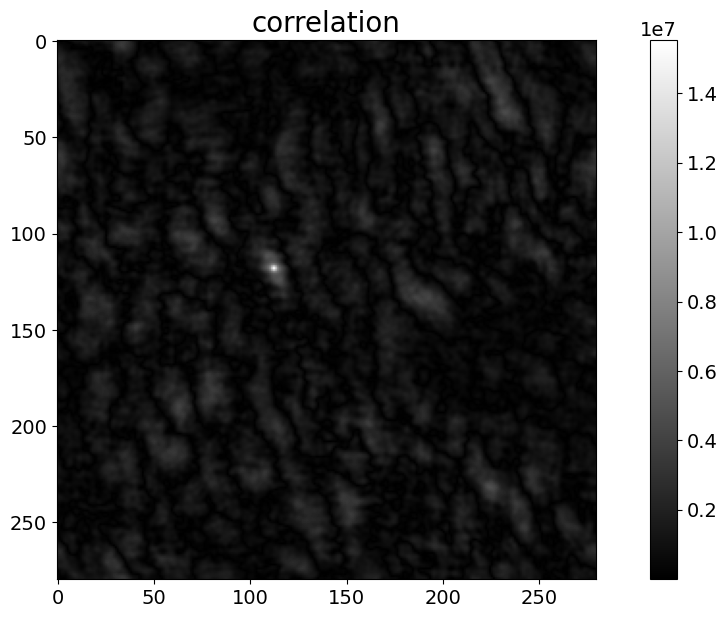

In [5]:
# compute convolution with rotated Waldo aka correlation with unrotated Waldo
result = np.fft.ifft2(scene_fft * waldo_fft)

plt.figure(figsize=(14, 7))
plt.imshow(np.abs(result), cmap=plt.cm.gray)
plt.title('correlation', fontsize=20)
plt.colorbar()
plt.show()

In [6]:
# find the correlation maximum
ind = np.unravel_index(np.argmax(result, axis=None), result.shape)
print('the bottom right corner is at row {}, column {}'.format(ind[0], ind[1]))

the bottom right corner is at row 118, column 112


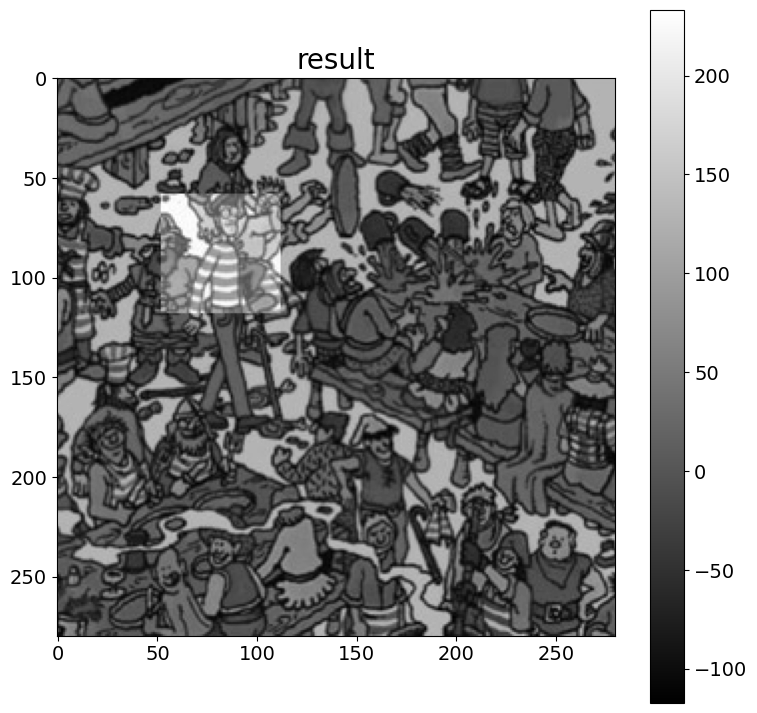

In [7]:
# indicate found position (which is bottom right of the square)
h,w = waldo.shape
waldo_found = waldo + 100
work = np.copy(scene)
work[ind[0]-h:ind[0], ind[1]-w:ind[1]] = waldo_found

plt.figure(figsize=(9, 9))
plt.imshow(work, cmap=plt.cm.gray)
plt.title('result', fontsize=20)
plt.colorbar()
plt.show()